# Модуль 1

## Часть 1

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

### 1.1

In [12]:
from pyutil import filereplace

filereplace("./training_datasets/Life_expectancy_dataset.csv","Greenland, Denmark","Greenland Denmark")

In [31]:
led=pd.read_csv('./training_datasets/Life_expectancy_dataset.csv')

In [14]:
led.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,"Macau, China",84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [15]:
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    object 
 1   Country       91 non-null     object 
 2   Overall Life  90 non-null     float64
 3   Male Life     90 non-null     float64
 4   Female Life   90 non-null     float64
 5   Continent     90 non-null     object 
dtypes: float64(3), object(3)
memory usage: 10.6+ KB


In [16]:
led.describe()

,Overall Life,Male Life,Female Life
count,90.000000,90.000000,90.000000
mean,79.727778,77.078889,82.514444
std,2.495075,2.587328,2.581854
min,76.100000,71.900000,77.800000
25%,77.625000,74.925000,80.525000
50%,79.450000,76.850000,82.650000
75%,81.475000,79.050000,84.100000
max,89.500000,85.600000,93.500000


In [17]:
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    object 
 1   Country       91 non-null     object 
 2   Overall Life  90 non-null     float64
 3   Male Life     90 non-null     float64
 4   Female Life   90 non-null     float64
 5   Continent     90 non-null     object 
dtypes: float64(3), object(3)
memory usage: 10.6+ KB


Во второй половине csv разделитель ; правим этот момент

In [32]:
for index, row in led.iterrows():
    if index>=90:
        data=row.Rank.split(';')
        led.loc[index,'Rank']=int(data[0])
        led.loc[index,'Country']=str(data[1])
        led.loc[index,'Overall Life']=float(data[2])
        led.loc[index,'Male Life']=float(data[3])
        led.loc[index,'Female Life']=float(data[4])
        led.loc[index,'Continent']=str(data[5])    

In [33]:
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    object 
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), object(3)
memory usage: 10.6+ KB


In [35]:
led[led['Continent']=='Oceania']

,Rank,Country,Overall Life,Male Life,Female Life,Continent
13,14,Australia,82.2,79.8,84.8,Oceania
28,29,New Zealand,81.2,79.1,83.3,Oceania
43,44,Wallis and Futuna,79.7,76.7,82.8,Oceania
63,64,"Northern Mariana Islands, US",78.0,75.3,80.8,Oceania
66,67,New Caledonia,77.7,73.7,81.9,Oceania
71,72,French Polynesia,77.2,74.9,79.6,Oceania
88,89,Tonga,76.2,74.7,77.8,Oceania
93,94,Cook Islands,75.8,73.0,78.8,Oceania
102,103,American Samoa,75.4,72.4,78.5,Oceania
106,107,Solomon Islands,75.3,72.7,78.1,Oceania


In [36]:
led[led['Continent']=='Oceania'].mean()

Overall Life    74.230
Male Life       71.625
Female Life     76.915
dtype: float64

#### Пункт 1.1 Выаолнен, был открыт файл, как датасет, средня  продолжительность жизни общая - Overall Life, и для мужчин и женщин отдельно сответсвенно. 

### 1.2

In [38]:
import string
default_symbols=string.ascii_letters

In [40]:
default_symbols=default_symbols+"., "

In [41]:
default_symbols

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ., '

In [57]:
for index in range(led.shape[0]):
    cntry=led.loc[index,'Country']
    if not all(x in default_symbols for x in cntry):
        print(cntry)

People's Republic of China
Timor-Leste
Cote d'Ivoire
Guinea-Bissau


Вот страны требуемы по заданию

In [58]:
cntrs=[]
for index in range(led.shape[0]):
    cntry=led.loc[index,'Country']
    if not all(x in default_symbols for x in cntry):
        cntrs.append(cntry)

In [92]:
result=[]
for c in cntrs:
    m=led[led['Country']==c]
    fm=m['Female Life'].values[0]
    mm=m['Male Life'].values[0]
    print(c,": ", float(fm)-float(mm))

People's Republic of China :  4.400000000000006
Timor-Leste :  3.200000000000003
Cote d'Ivoire :  2.3999999999999986
Guinea-Bissau :  4.100000000000001


Пункт 1.2 выполнен.

### 1.3

In [115]:
#led[led['Country'].str.len().sort_values()]
idx=led.Country.str.len().sort_values().index
led.loc[idx[-3:]]

,Rank,Country,Overall Life,Male Life,Female Life,Continent
205,206,Democratic Republic of the Congo,57.3,55.8,58.9,Africa
104,105,Saint Vincent and the Grenadines,75.3,73.3,77.4,North America
44,45,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa


#### так пункт 1.3 выполнен
самый популярный континент Африка

## Часть 2

### 2.1

In [3]:
from PIL import Image, ImageEnhance
im = Image.open("./training_datasets/matrix.png")

In [55]:
im1r = np.array(im, np.uint8)
 
im1r[::, ::, 2] = 

# Creating an image from the modified array
im1 = Image.fromarray(im1r)
plt.imshow(im1)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=987x660 at 0x2076A178880>


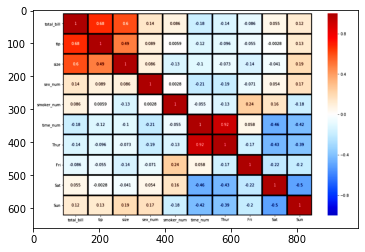

In [57]:

enhancer = ImageEnhance.Contrast(im)
factor = 2
im_output = enhancer.enhance(factor)
import matplotlib.pyplot as plt
plt.imshow(im_output)


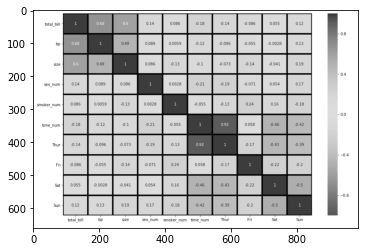

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('./training_datasets/matrix.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

## Часть 3

### 3.1

In [85]:
import codecs
fileObj = codecs.open( "./training_datasets/Aristotle.txt", "r", "utf_8_sig" )
text = fileObj.readlines()
textt=fileObj.read()
c=textt.lower().count('человек')
print('Количество строк =',len(text))
print("Слово человек встрелось раз",c)
fileObj.close()

Количество строк = 21617
Слово человек встрелось раз 0


## Часть 4

In [93]:
df1=pd.read_csv('./training_datasets/Energy_consumption/AEP_hourly.csv')
df1 = df1[~df1.index.duplicated(keep='first')]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


In [96]:
df_paths=['./training_datasets/Energy_consumption/AEP_hourly.csv',
          './training_datasets/Energy_consumption/COMED_hourly.csv',
          './training_datasets/Energy_consumption/DAYTON_hourly.csv',
          './training_datasets/Energy_consumption/DEOK_hourly.csv'
          './training_datasets/Energy_consumption/DOM_hourly.feather',
          './training_datasets/Energy_consumption/DUQ_hourly.csv',
          './training_datasets/Energy_consumption/EKPC_hourly.csv',
          './training_datasets/Energy_consumption/FE_hourly.HDF',
          './training_datasets/Energy_consumption/NI_hourly.csv',
          './training_datasets/Energy_consumption/PJME_hourly.csv',
          './training_datasets/Energy_consumption/PJMW_hourly.csv',
           './training_datasets/Energy_consumption/PJM_Load_hourly.json',
           './training_datasets/Energy_consumption/pjm_hourly_est.csv'
         ]

In [103]:
def generate(path):
    dfs=[]
    for i in df_paths:
        if i[-4:0]=='.csv':
            print(i[-4:0])
            df1=pd.read_csv('./training_datasets/Energy_consumption/AEP_hourly.csv')
            df1 = df1[~df1.index.duplicated(keep='first')]
            dfs.append(i)
    print(len(dfs))
    df=pd.concat(dfs, ignore_index=False)
    df.to_csv("./data.csv")

In [104]:
generate(df_paths)

0


ValueError: No objects to concatenate